In [1]:
#importing all the imprtant libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
plt.style.use('ggplot')

import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score



### Reading Data

In [2]:
#reading data
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

### Understanding Data

In [3]:
# displaying dataframe of fake news
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#displaying dataframe of real news
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### we can see that there is no missing data in the datasets

In [7]:
#checking for unique subjects in real dataframe
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [8]:
#checking for unique subjects in fake dataframe
real.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

### subject coulmn is unevenly distributed and hence will hamper our classification also the date colums is not useful we can remove that aswell

In [9]:
# dropping redundant columns
fake.drop(['date', 'subject'], axis=1, inplace=True)
real.drop(['date', 'subject'], axis=1, inplace=True)

### Labelling fake and real news [ fake = 0, real = 1]

In [10]:
#labelling data
fake['class'] = 0 
real['class'] = 1

### Visualising the distribution of fake and real news

Text(0, 0.5, '# of News Articles')

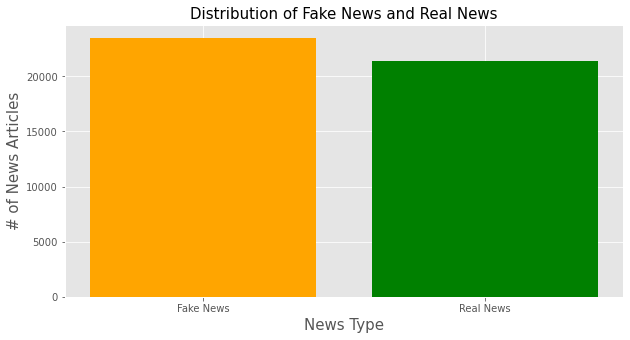

In [11]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake), color='orange')
plt.bar('Real News', len(real), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)

In [12]:
# Difference between number of fake news and real news
print('Difference in news articles:',len(fake)-len(real))

Difference in news articles: 2064


In [13]:
# combining the the fake and real dataset
news = pd.concat([fake, real], ignore_index=True, sort=False)
news

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [14]:
# combining the text and title for simplification
news['text'] = news['title'] + news['text']
news.drop('title', axis=1, inplace=True)

### Data PreProcessing

In [15]:
## splitting the data into test and train
features = news['text']
targets = news['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30, random_state=18)

In [16]:
## Normalising the data removing url's, blank spaces,symbols etc.
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [17]:

max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [18]:
#converting txt to vector
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [19]:
# padding so that all articles have same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

### Building model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
__________________________________________________

In [21]:
# early stop to stop training if validation loss stops improving
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
943/943 [==============================] - 300s 318ms/step - loss: 0.3077 - accuracy: 0.8274 - val_loss: 0.1029 - val_accuracy: 0.9660
Epoch 2/10
943/943 [==============================] - 328s 348ms/step - loss: 0.0920 - accuracy: 0.9696 - val_loss: 0.0596 - val_accuracy: 0.9803
Epoch 3/10
943/943 [==============================] - 384s 407ms/step - loss: 0.0497 - accuracy: 0.9866 - val_loss: 0.0434 - val_accuracy: 0.9822
Epoch 4/10
943/943 [==============================] - 338s 359ms/step - loss: 0.0251 - accuracy: 0.9936 - val_loss: 0.0370 - val_accuracy: 0.9870
Epoch 5/10
943/943 [==============================] - 298s 316ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.0368 - val_accuracy: 0.9889
Epoch 6/10
943/943 [==============================] - 310s 328ms/step - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.0480 - val_accuracy: 0.9863
Epoch 7/10
943/943 [==============================] - 297s 315ms/step - loss: 0.0146 - accuracy: 0.9958 - val_loss: 0.0381 -

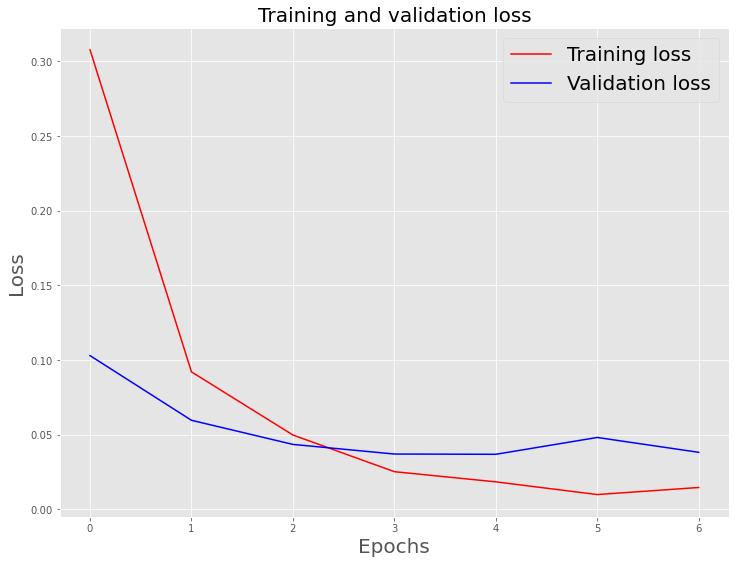

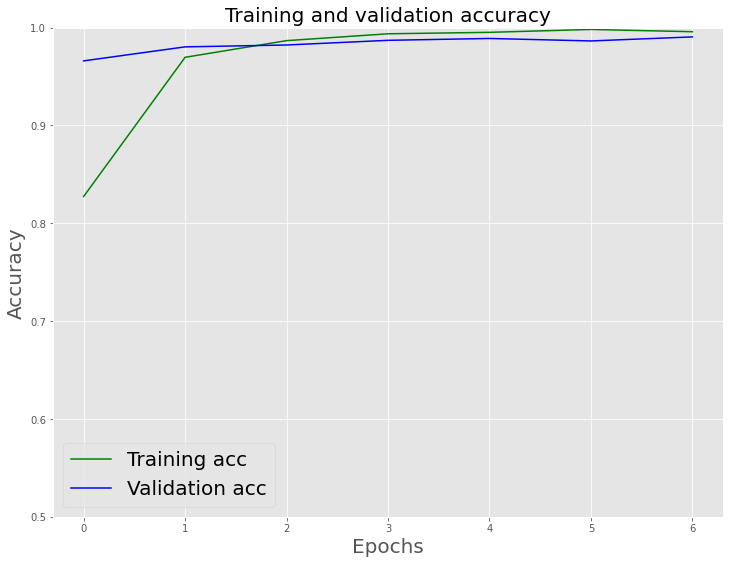

In [22]:
# Visualising Training and validation loss
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

### Evaluating the model

In [23]:
# model evaluation
model.evaluate(X_test, y_test)

421/421 [==============================] - 35s 83ms/step - loss: 0.0415 - accuracy: 0.9880


[0.041530925780534744, 0.9879732728004456]

In [24]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [25]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9879732739420936
Precision on testing set: 0.9893832943013271
Recall on testing set: 0.9853832996423574


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

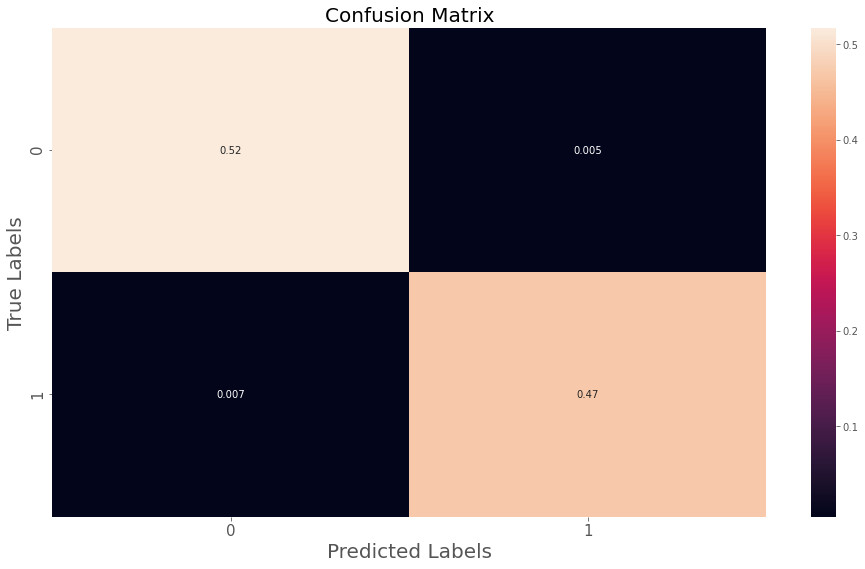

In [26]:
## Visualising confusion matrix
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)